# Introduction

* Support Vectors
* Sepparate with a straight line(linearly separable)
* margin
    * Hard margin classification
        * Strictly based on those that are at the margin between the two classes.
        * However,this is sensitive to outliers
    * Soft margin classification
        * Widen the margin and allows for violation.
        * With Python Scikit-library ,you control the width of the margin.
        * Control with C hyperparameter.
            * smaller C leads to a wider street but margin violations.
            * High C fewer margin violations but ends up with a smaller margin.
            
* Note:
    * SVM are Sensitive to feature scaling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)

import sys
print(sys.version)

import sklearn
print(sklearn.__version__)

1.19.2
1.2.2
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
0.24.1


In [6]:
df=sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [8]:
col=['petal_length','petal_width','species']
df.loc[:,col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [9]:
df.loc[:,col]

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


In [10]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [11]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [12]:
col=['petal_length','petal_width']
x=df.loc[:,col]

In [13]:
x

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [17]:
species_to_num={
    'setosa':0,
    'versicolor':1,
    'virginica':2
}
df['target']=df['species'].map(species_to_num)

In [20]:
df.drop('tmp',axis=1,inplace=True)

In [21]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [22]:
y=df['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

## Documentation on each

* LinearSVC
    * Similar to SVC with parameter kernel='linear',but implemented in terms of liblinear rather than libsvm,so it has more flexibility in the choice of penalties and loss function and should scale better to large numbers of samples
* SVC
    * C support vectore classification.
    * The implementation is based on libsvm.The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

In [23]:
model=svm.SVC(C=.001, kernel='linear')

In [24]:
model.fit(x,y)

SVC(C=0.001, kernel='linear')

In [26]:
model.predict([[6,2]])

array([2], dtype=int64)

In [28]:
xv=x.values.reshape(-1,1)
h=0.02
x_min,x_max=xv.min(),xv.max()+1
y_min,y_max=y.min(),y.max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

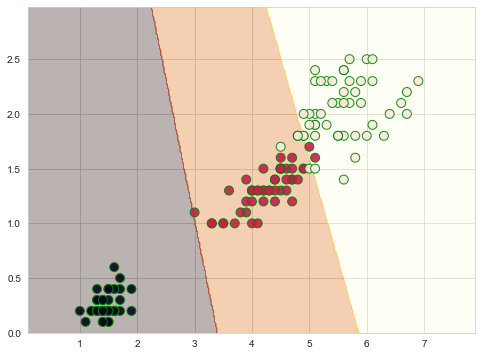

In [30]:
z=model.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)
fig=plt.figure(figsize=(8,6))
ax=plt.contourf(xx,yy,z,cmap='afmhot',alpha=0.3);
plt.scatter(x.values[:,0],x.values[:,1],c=y,s=80,alpha=0.9,edgecolors='g');

## Linear SVM Implementation

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Scale Features

In [52]:
sc_x=StandardScaler()
x_std_train=sc_x.fit_transform(x_train)

In [53]:
model=svm.SVC(kernel='linear',C=1)
model.fit(x_std_train,y_train)

SVC(C=1, kernel='linear')

In [54]:
model.score(x_test,y_test)

0.2

## Cross Walidation Within Train DataSet.

In [55]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [56]:
res=cross_val_score(model,x_std_train,y_train,cv=5,scoring='accuracy')
print('Average accuracy:\t {0:.4f}'.format(np.mean(res)))
print('Average SD:\t\t {0:.4f}'.format(np.std(res)))

Average accuracy:	 0.9500
Average SD:		 0.0408


In [57]:
y_train_pred=cross_val_predict(model,x_std_train,y_train,cv=3)
y_train

137    2
84     1
27     0
127    2
132    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: target, Length: 120, dtype: int64

In [58]:
confusion_matrix(y_train,y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [59]:
print('Precision Score:\t {0:.4f}'.format(precision_score(y_train,y_train_pred,average='weighted')))
print('Precision Score:\t {0:.4f}'.format(recall_score(y_train,y_train_pred,average='weighted')))
print('Precision Score:\t {0:.4f}'.format(f1_score(y_train,y_train_pred,average='weighted')))

Precision Score:	 0.9500
Precision Score:	 0.9500
Precision Score:	 0.9500


## Cross validation within test dataset

In [60]:
y_test_pred=cross_val_predict(model,sc_x.transform(x_test),y_test,cv=3)
y_test_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [61]:
confusion_matrix(y_test,y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [62]:
print('Precision Score:\t {0:.4f}'.format(precision_score(y_test,y_test_pred,average='weighted')))
print('Precision Score:\t {0:.4f}'.format(recall_score(y_test,y_test_pred,average='weighted')))
print('Precision Score:\t {0:.4f}'.format(f1_score(y_test,y_test_pred,average='weighted')))

Precision Score:	 0.9422
Precision Score:	 0.9333
Precision Score:	 0.9290
